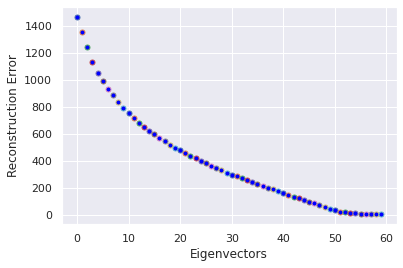

In [24]:
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

def my_pca(X):
  # returns transformed X, prin components, var explained
  dim = len(X[0])  # n_cols
  means = np.mean(X, axis=0)
  z = X - means  # avoid changing X
  square_m = np.dot(z.T, z)
  (evals, evecs) = np.linalg.eig(square_m)  # 'right-hand'
  trans_x = np.dot(z, evecs[:,0:dim])  # eigenvecs used to transform x
  prin_comp = evecs.T  # principal components are just eigenvecs T
  v = np.var(trans_x, axis=0, ddof=1)  # col sample var
  sv = np.sum(v)
  ve = v / sv
  # order everything based on variance explained
  ordering = np.argsort(ve)[::-1]  # sort order high to low
  trans_x = trans_x[:,ordering]
  prin_comp = prin_comp[ordering,:]
  ve = ve[ordering]
  return (trans_x, prin_comp, ve)

def reconstructed(X, n_comp, trans_x, p_comp):
  means = np.mean(X, axis=0)
  result = np.dot(trans_x[:,0:n_comp], p_comp[0:n_comp,:])
  result += means
  return result

def recon_error(X, XX):
  diff = X - XX
  diff_sq = np.linalg.norm(diff)
  err = np.sum(diff_sq)
  return err

def plot_digits(data):
  fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                            subplot_kw={'xticks':[], 'yticks':[]},
                            gridspec_kw=dict(hspace=0.1, wspace=0.1))
  for i, ax in enumerate(axes.flat):
    ax.imshow(data[i].reshape(8, 8),
              cmap='binary', interpolation='nearest',
              clim=(0, 16))


digits = load_digits()
X = digits.data
(trans_x, p_comp, ve) = my_pca(X)

for eigs in range(0, 60):
  XX = reconstructed(X, eigs, trans_x, p_comp)
  re = recon_error(X, XX)
  plt.plot(eigs, re, marker="o", markersize=5, markerfacecolor="blue")

  plt.xlabel('Eigenvectors')
  plt.ylabel('Reconstruction Error');

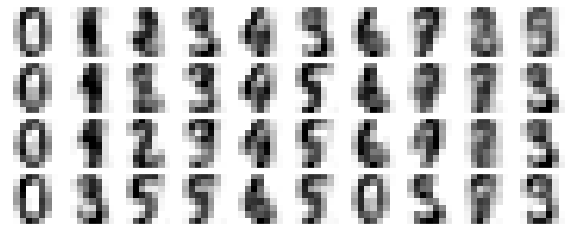

In [25]:
  XX = reconstructed(X, 5, trans_x, p_comp)
  plot_digits(XX)

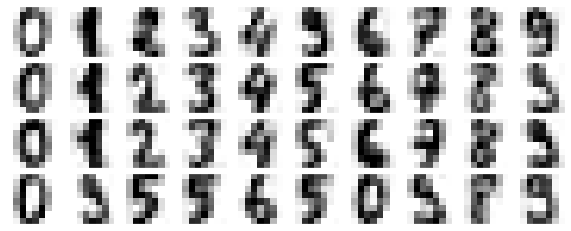

In [26]:
  XX = reconstructed(X, 15, trans_x, p_comp)
  plot_digits(XX)

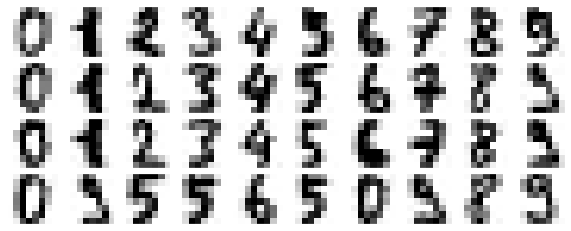

In [23]:
XX = reconstructed(X, 45, trans_x, p_comp)
plot_digits(XX)
